In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Load the cleaned data set
file="C:/DataAnalystWorkspace/Sales Analysis for e-comerence/AmazonSales/__cleaned_sales_data.csv"
df=pd.read_csv(file)
df

,Unnamed: 0,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,...,Not Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False
1,1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,...,Not Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False
4,4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,No Promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,...,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,No Promotion,False
128971,128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,...,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,...,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,No Promotion,False
128973,128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,...,Shipped,1,INR,1199.00,HALOL,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


# Find The highest product ordered by category

In [6]:
data1= pd.DataFrame(df['Category'].value_counts()).reset_index()

data1

,Category,count
0,Set,50284
1,kurta,49877
2,Western Dress,15500
3,Top,10622
4,Ethnic Dress,1159
5,Blouse,926
6,Bottom,440
7,Saree,164
8,Dupatta,3


<Axes: xlabel='Category', ylabel='count'>

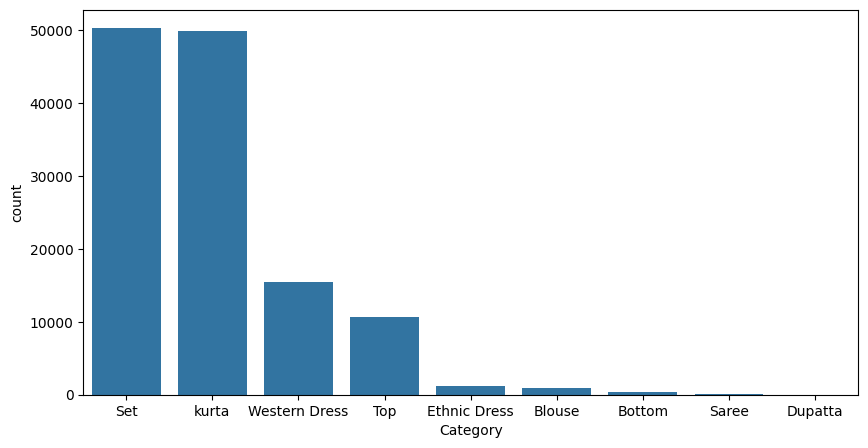

In [7]:
plt.figure(figsize=(10,5))
sn.barplot(data=data1,x="Category", y="count")

# Find Top 5 products ordered(Most Popular)

In [8]:
top5Prodcuts=pd.DataFrame(df['Category'].value_counts().nlargest(5)).reset_index()
top5Prodcuts

,Category,count
0,Set,50284
1,kurta,49877
2,Western Dress,15500
3,Top,10622
4,Ethnic Dress,1159


<Axes: xlabel='Category', ylabel='count'>

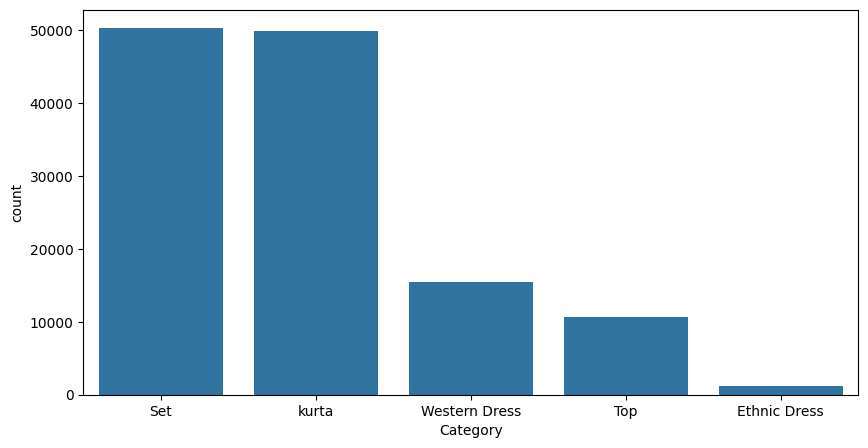

In [9]:
plt.figure(figsize=(10,5))
sn.barplot(data=top5Prodcuts,x="Category", y="count")

# Find Total Revenue Over Different Months

In [19]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month_name()
df["Month"]

0         April
1         April
2         April
3         April
4         April
          ...  
128970      May
128971      May
128972      May
128973      May
128974      May
Name: Month, Length: 128975, dtype: object

In [34]:
monthdata=df.groupby(['Month'])['Amount'].sum().sort_values(ascending=False).reset_index()
monthdata

,Month,Amount
0,April,28838708.32
1,May,26226476.75
2,June,23425809.38
3,March,101683.85


<Axes: xlabel='Month', ylabel='Amount'>

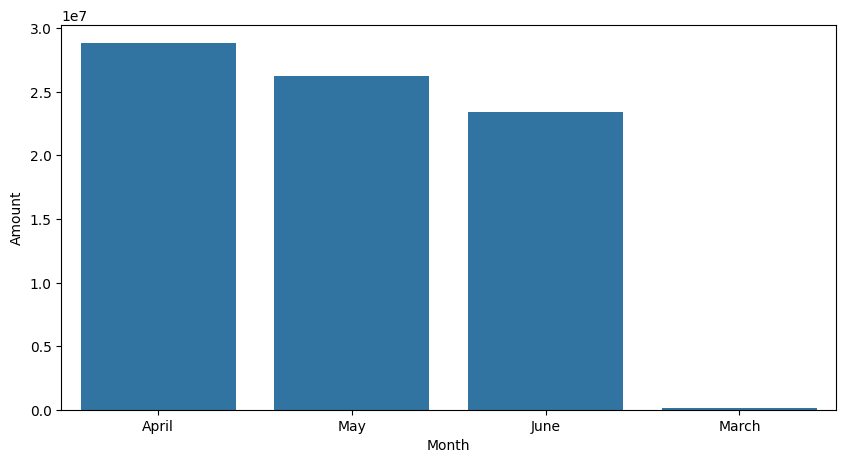

In [35]:
plt.figure(figsize=(10,5))
sn.barplot(data=monthdata,x='Month',y='Amount')

# Find Total Revenue Over Different Days

In [36]:
df['Date'].dt.day

0         30
1         30
2         30
3         30
4         30
          ..
128970    31
128971    31
128972    31
128973    31
128974    31
Name: Date, Length: 128975, dtype: int32

In [37]:
df['Day']=df['Date'].dt.day
df['Day']

0         30
1         30
2         30
3         30
4         30
          ..
128970    31
128971    31
128972    31
128973    31
128974    31
Name: Day, Length: 128975, dtype: int32

In [39]:
daydata=df.groupby(['Day'])['Amount'].sum().reset_index()
daydata

,Day,Amount
0,1,2880866.33
1,2,2982101.41
2,3,2940626.16
3,4,2983899.44
4,5,2834341.25
5,6,2751791.52
6,7,2787150.37
7,8,2886262.76
8,9,2742205.46
9,10,2597647.85


<Axes: xlabel='Day', ylabel='Amount'>

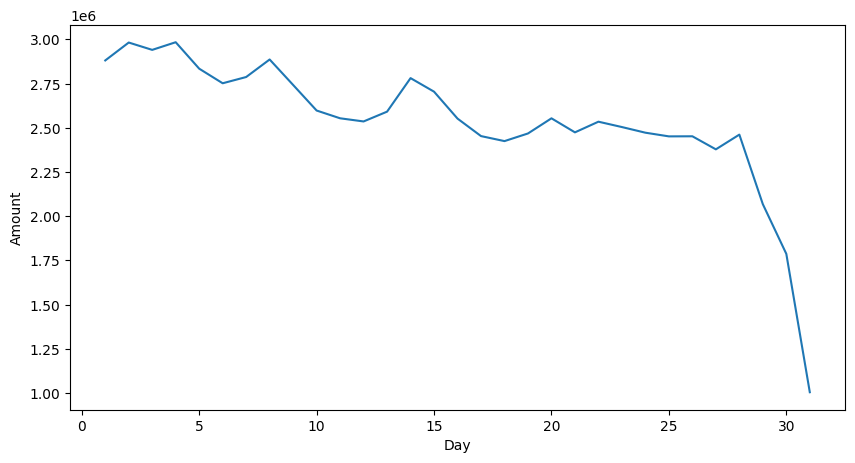

In [40]:
plt.figure(figsize=(10,5))
sn.lineplot(data=daydata,x='Day',y='Amount')

# Find Percentage of Revenue by Size

In [42]:
size_data=df.groupby(['Size'])['Amount'].sum().sort_index(ascending=False).reset_index()
size_data

,Size,Amount
0,XXL,10636288.45
1,XS,7022375.20
2,XL,12464965.86
3,S,10629210.18
4,M,13906754.37
5,L,13234886.19
6,Free,205192.77
7,6XL,576249.33
8,5XL,425156.63
9,4XL,334451.64


([<matplotlib.patches.Wedge at 0x1db70c564e0>,
 [Text(1.0020675853971548, 0.4537185849139486, 'XXL'),
  Text(0.46829401713450713, 0.9953394966120988, 'XS'),
  Text(-0.36601635861182535, 1.037319635034708, 'XL'),
  Text(-1.0480889262546325, 0.3339305356843125, 'S'),
  Text(-0.8606044880453975, -0.685098471138361, 'M'),
  Text(0.2039379644265711, -1.0809298342933953, 'L'),
  Text(1.3905691307455461, -1.5736319431867087, 'Free'),
  Text(1.4390377913578254, -1.5294346128697336, '6XL'),
  Text(1.4990908731113302, -1.4706211456912723, '5XL'),
  Text(1.543046797084901, -1.4244320208441077, '4XL'),
  Text(1.027127543541331, -0.3937118353551893, '3XL')],
 [Text(0.546582319307539, 0.2474828644985174, '13.53%'),
  Text(0.2554331002551857, 0.5429124526975083, '8.94%'),
  Text(-0.1996452865155411, 0.5658107100189316, '15.86%'),
  Text(-0.5716848688661631, 0.18214392855507952, '13.52%'),
  Text(-0.469420629842944, -0.37369007516637864, '17.69%'),
  Text(0.11123888968722061, -0.589598091432761, '16.8

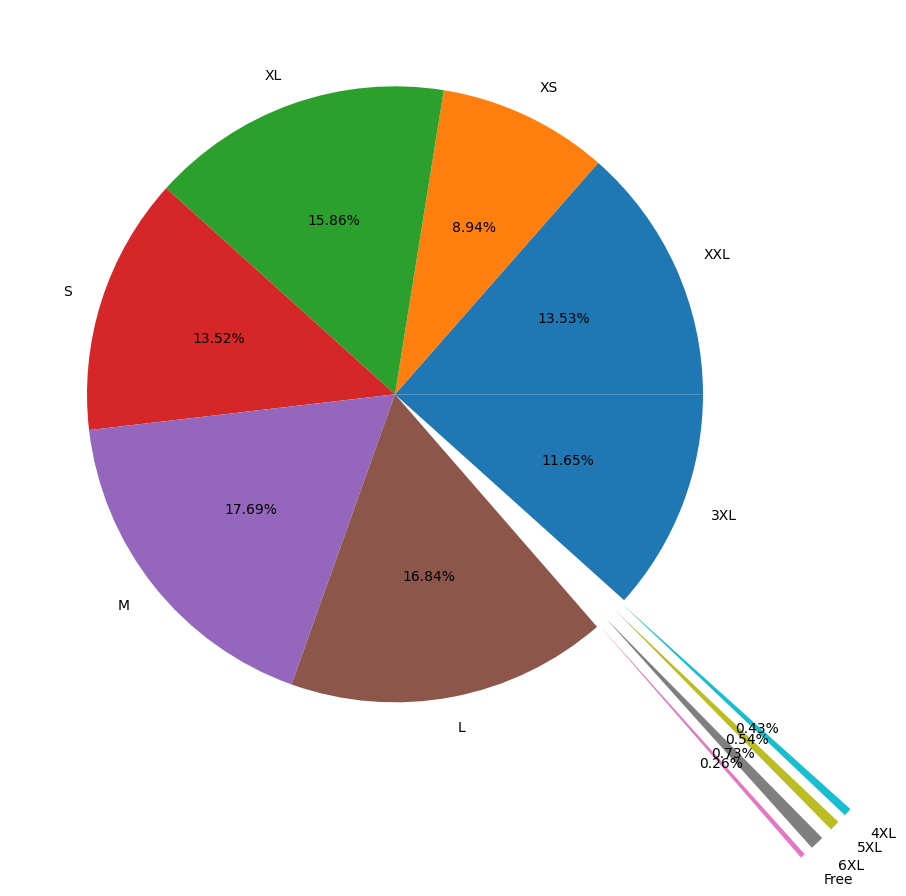

In [44]:
plt.figure(figsize=(10,10))
plt.pie(size_data["Amount"], labels=size_data["Size"], autopct="%0.2f%%", explode=[0,0,0,0,0,0,1,1,1,1,0])


# Products with high Return or Cancel

In [45]:
cancelledData=df[df['Status']=="Cancelled"]
cancelledData

,Unnamed: 0,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month,Day
0,0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False,April,30
3,3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False,April,30
8,8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,...,INR,0.00,HYDERABAD,TELANGANA,500008,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,April,30
23,23,23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,...,INR,570.48,pune,MAHARASHTRA,411044,IN,No Promotion,False,April,30
29,29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,...,INR,0.00,GUWAHATI,ASSAM,781003,IN,No Promotion,False,April,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128961,128961,128961,402-0082204-6323568,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-A-XL,...,INR,771.00,junagadh,Gujarat,362001,IN,No Promotion,False,May,31
128962,128962,128962,408-9803724-6565965,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,MEN5024,MEN5024-KR-L,...,INR,665.00,MUMBAI,MAHARASHTRA,400056,IN,No Promotion,False,May,31
128965,128965,128965,408-5154281-4593912,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,J0119,J0119-TP-XXXL,...,INR,574.00,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007,IN,No Promotion,False,May,31
128967,128967,128967,404-5182288-1653947,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,...,INR,0.00,KOLKATA,WEST BENGAL,700040,IN,No Promotion,False,May,31


In [47]:
high_Cancelled_Product=pd.DataFrame({'Cancelled_Count':cancelledData.groupby(['Category'])['Status'].count().sort_values(ascending=False)}).reset_index()
high_Cancelled_Product

,Category,Cancelled_Count
0,Set,7337
1,kurta,7255
2,Western Dress,2122
3,Top,1276
4,Ethnic Dress,145
5,Blouse,116
6,Bottom,60
7,Saree,21


([<matplotlib.patches.Wedge at 0x1db701cc500>,
 [Text(0.33916565404355425, 1.0464065458115255, 'Set'),
  Text(-0.8975453232327743, -0.6359342676275392, 'kurta'),
  Text(0.667966323594628, -0.8739685294926111, 'Western Dress'),
  Text(1.038529338095065, -0.36256973662431663, 'Top'),
  Text(2.091047627185925, -0.19370033773877127, 'Ethnic Dress'),
  Text(2.097617258152869, -0.10000919107382347, 'Blouse'),
  Text(2.099679181672922, -0.036706049219806844, 'Bottom'),
  Text(2.0999864009023406, -0.007557514487900032, 'Saree')],
 [Text(0.18499944766012047, 0.5707672068062866, '40.02%'),
  Text(-0.4895701763087859, -0.3468732368877487, '39.58%'),
  Text(0.3643452674152516, -0.4767101069959696, '11.58%'),
  Text(0.5664705480518536, -0.1977653108859909, '6.96%'),
  Text(1.5931791445226091, -0.14758120970573047, '0.79%'),
  Text(1.598184577640281, -0.07619747891338931, '0.63%'),
  Text(1.5997555669888932, -0.027966513691281402, '0.33%'),
  Text(1.5999896387827355, -0.005758106276495262, '0.11%')]

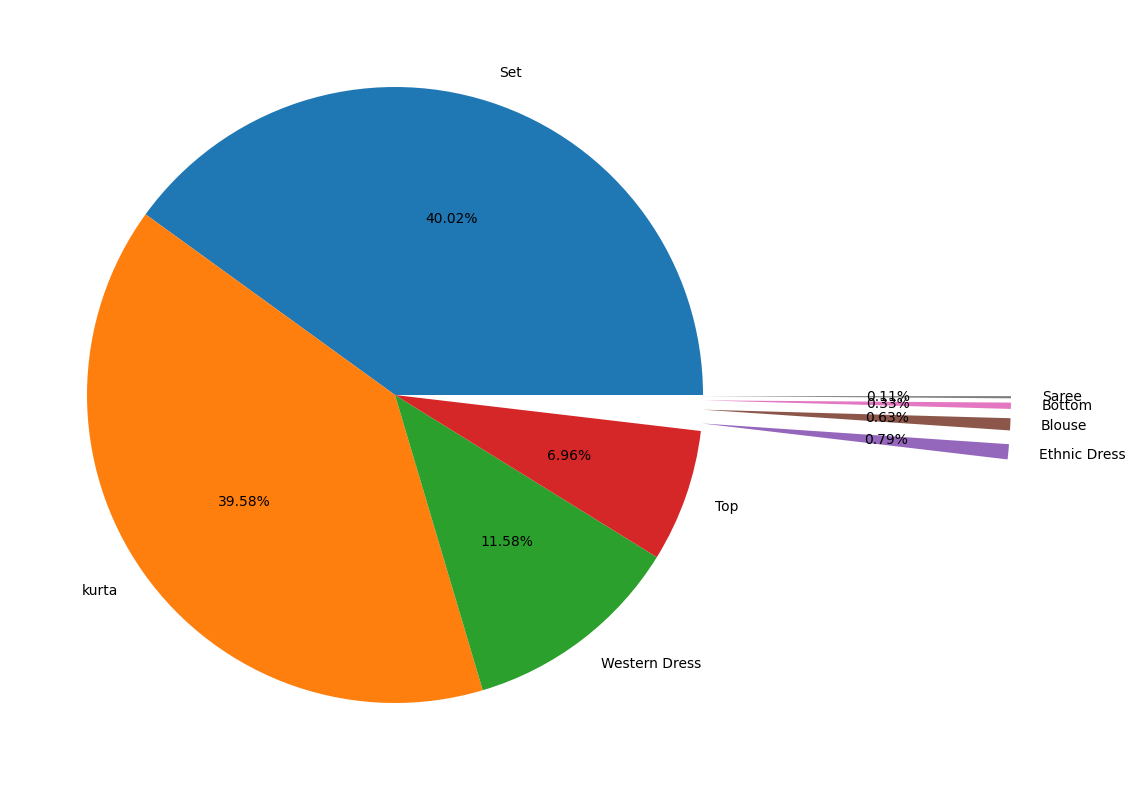

In [52]:
plt.figure(figsize=(10,10))
plt.pie(high_Cancelled_Product['Cancelled_Count'],labels=high_Cancelled_Product['Category'],autopct="%0.2f%%",explode=[0,0,0,0,1,1,1,1])